# Importing Libraries

In [1]:
# Importing python libraries
import numpy as np
import pandas as pd

# For all the graphs
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import sklearn
assert sklearn.__version__ >= "0.20", 'You need version 0.2 or greater of Scikit-learn'
from sklearn.preprocessing import PolynomialFeatures
# Import the Scikit-Learn models that you intend to use
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import,  wrangling and cleaning data 
## Import data, first download the csv file. Set the date format correctly in excel. Use unique filepath for each device.

In [2]:
product_data = pd.read_csv(r'data.csv', thousands = ",") # read the .csv file

In [3]:
# Display raw data

product_data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50


In [39]:
# Convert date from string to datetime and remove unneeded data points

product_data['Date']= pd.to_datetime(product_data['Date'])
product_data = product_data.drop_duplicates()
product_data = product_data.drop("Warehouse", axis = 1)
product_data = product_data[~product_data["Date"].isna()]

KeyError: "['Warehouse'] not found in axis"

In [5]:
# Select product 1295

product_1295 = product_data[product_data["Product_Code"]=="Product_1295"]

In [6]:
# Index date and group by month

product_1295.set_index("Date", inplace=True)
product_1295 = product_1295.groupby(pd.Grouper(freq='M'))['Order_Demand'].sum()

Text(0, 0.5, 'Order Demand')

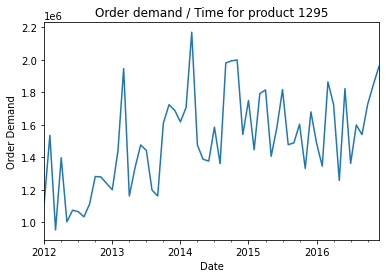

In [7]:
# Plot product 1295 data against order demand

product_1295.plot()
plt.title("Order demand / Time for product 1295") 
plt.xlabel("Date") 
plt.ylabel("Order Demand")

In [8]:
# Prints out most in demand product

total_product_demand = product_data.groupby(['Product_Code']).count()['Order_Demand']
print(total_product_demand.idxmax())

Product_1359


Text(0, 0.5, 'Order Demand')

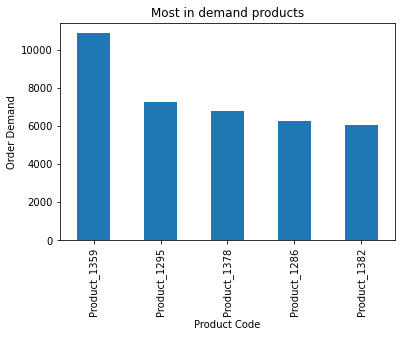

In [9]:
# Display bar chart for top 5 most in demand products

total_product_demand.sort_values(ascending = False).head(5).plot.bar()
plt.title("Most in demand products") 
plt.xlabel("Product Code") 
plt.ylabel("Order Demand")

In [10]:
product_1359 = product_data[product_data["Product_Code"]=="Product_1359"]
product_1359.set_index("Date", inplace=True)
product_1359 = product_1359.groupby(pd.Grouper(freq='M'))['Order_Demand'].sum()

Text(0, 0.5, 'Order_Demand')

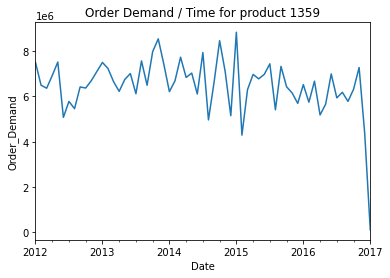

In [11]:
product_1359.plot()
plt.title("Order Demand / Time for product 1359") 
plt.xlabel("Date") 
plt.ylabel("Order_Demand")

In [12]:
type(product_1359)

pandas.core.series.Series

# Start of regression analysis for product 1359


In [13]:
# Start to seperate out training and testing data. Note date values not in the ideal format, unfortunately...

x = np.arange(0,len(product_1359.index)).reshape(-1,1)
y = product_1359.values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# Linear regression model

model_linear = sklearn.linear_model.LinearRegression()

In [16]:
# Train model

model_linear.fit(x_train, y_train)

LinearRegression()

In [17]:
# Apply model on test data

prediction_1359 = model_linear.predict(x_test)

Text(0, 0.5, 'Order_Demand')

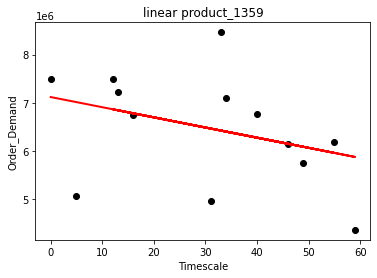

In [18]:
# Plot linear regression

plt.scatter(x_test, y_test, color="black")
plt.plot(x_test,prediction_1359, color="red", linewidth=2)
plt.title("linear product_1359") 
plt.xlabel("Timescale") 
plt.ylabel("Order_Demand")

In [19]:
# Calculate coefficients

linear_slope = model_linear.coef_
linear_intercept = model_linear.intercept_
print(linear_slope)
print(linear_intercept)

[-21036.22933062]
7120917.948918732


In [20]:
# Start of polynomial code

x =  np.arange(0,len(product_1359.index))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, product_1359.values, test_size=0.2, shuffle = False)

In [22]:
z = np.polyfit(x, product_1359.values, 7) # Change value for different plotting. Value represents the degree. 
f = np.poly1d(z)
print(f)

           7          6         5         4             3             2
-0.001307 x + 0.2637 x - 21.23 x + 870.7 x - 1.922e+04 x + 2.186e+05 x - 1.051e+06 x + 7.729e+06


Text(0, 0.5, 'Order_Demand')

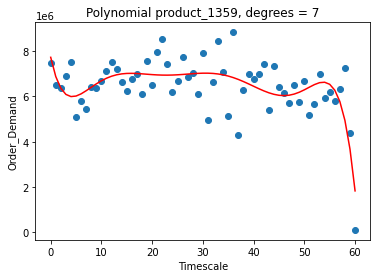

In [23]:
plt.scatter(x, y)
plt.plot(x, f(x), '-r') # plot poly for p_1359

plt.title("Polynomial product_1359, degrees = 7") 
plt.xlabel("Timescale") 
plt.ylabel("Order_Demand")

In [24]:
# Calculating the RMSE for product 1359. Iterate through a for loop for values 1 to 19.

RMSE_array = []

for i in range (1, 19):
    z = np.polyfit(x, product_1359.values, i)
    f = np.poly1d(z)
    
    modelPredictions = np.polyval(z, x)
    absError = modelPredictions - product_1359.values
    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    RMSE_array.append(RMSE)
print(RMSE_array) # Prints into an array

[1182722.4414166918, 1092905.2866453086, 1074007.6981109723, 1066369.7199206925, 982557.4529183145, 968919.4472610956, 920279.1522168195, 872836.6838295195, 839288.08783568, 821247.7712834416, 820204.9244933033, 813419.8227846215, 804022.6948723502, 798202.4523557771, 774098.9224795882, 768779.8067035221, 754269.9771370313, 754243.5002270569]


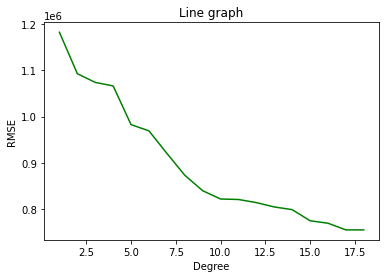

In [25]:
# Plot RMSE graph

x = np.arange(1, 19)
y = np.array(RMSE_array)
plt.title("Line graph")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.plot(x, y, color ="green")
plt.show()

# Start of product_1295

In [26]:
x1 = np.arange(0,len(product_1295.index)).reshape(-1,1)
y1 = product_1295.values

In [27]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [28]:
model_linear_1295 = sklearn.linear_model.LinearRegression()

In [29]:
model_linear_1295.fit(x1_train, y1_train)

LinearRegression()

In [30]:
prediction_1295 = model_linear_1295.predict(x1_test)

Text(0, 0.5, 'Order_Demand')

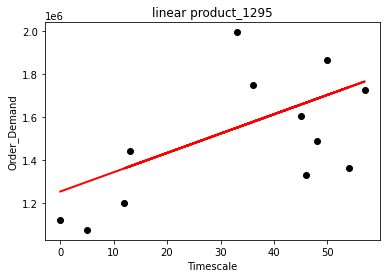

In [31]:
plt.scatter(x1_test, y1_test, color="black")
plt.plot(x1_test,prediction_1295, color="red", linewidth=2)
plt.title("linear product_1295") 
plt.xlabel("Timescale") 
plt.ylabel("Order_Demand")

In [32]:
linear_slope1 = model_linear_1295.coef_
linear_intercept1 = model_linear_1295.intercept_
print(linear_slope1)
print(linear_intercept1)

[8991.674114]
1252054.474785446


In [33]:
x1 =  np.arange(0,len(product_1295.index))


In [34]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, product_1295.values, test_size=0.2, shuffle = False)

In [35]:
z = np.polyfit(x1, product_1295.values, 7)
f = np.poly1d(z)
print(f)

            7            6          5         4         3             2
-2.656e-05 x + 0.006783 x - 0.6693 x + 33.86 x - 967.4 x + 1.514e+04 x - 8.797e+04 x + 1.285e+06


Text(0, 0.5, 'Order_Demand')

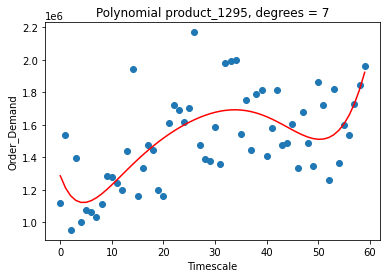

In [36]:
plt.scatter(x1, y1)
plt.plot(x1, f(x1), '-r') # plot poly for p_1295
plt.title("Polynomial product_1295, degrees = 7") 
plt.xlabel("Timescale") 
plt.ylabel("Order_Demand")

In [37]:
# Calculating the RMSE for product 1295

RMSE_array = []

for i in range (1, 19):
    z = np.polyfit(x1, product_1295.values, i)
    f = np.poly1d(z)
    
    modelPredictions = np.polyval(z, x1)
    absError = modelPredictions - y1
    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    RMSE_array.append(RMSE)
print(RMSE_array)

[240225.11440003343, 226780.32970007937, 225646.5606905705, 208215.85250579164, 208097.44265919406, 207319.9579244318, 207247.40278461392, 206937.725243787, 204527.19790398842, 203911.26023866318, 202862.06689504065, 199448.92416813588, 198502.75498491334, 197757.18949256308, 197534.4404795452, 191967.85998150066, 188810.64894747158, 186014.35158009492]


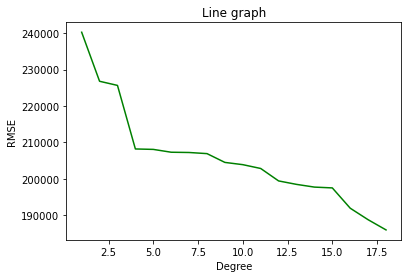

In [38]:
x = np.arange(1, 19)
y = np.array(RMSE_array)
plt.title("Line graph")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.plot(x, y, color ="green")
plt.show()